In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Passed' : [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)


In [4]:
x = df[['Hours_Studied']]
y = df['Passed']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)



In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\npredicted classes (on test data):\n", y_pred )

Accuracy: 1.0

predicted classes (on test data):
 [1 0 1]



Decision Boundary (approx): 4.64 hours


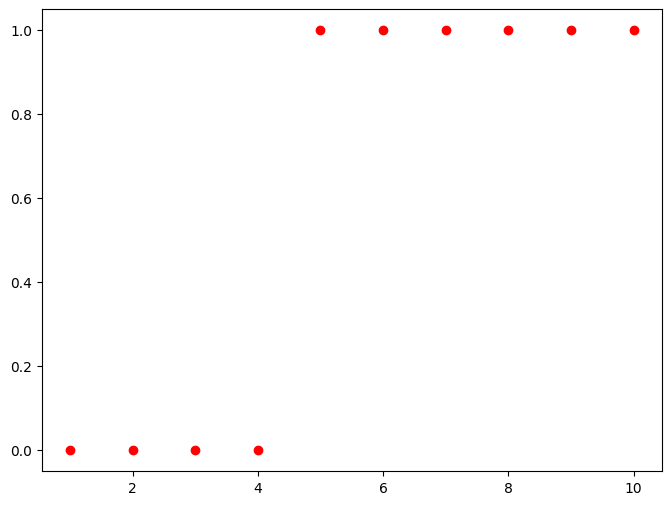

In [ ]:
x_range = pd.DataFrame(np.linspace(0, 10, 200), columns=['Hours_Studied'])
y_prob_curve = model.predict_proba(x_range)[:, 1]

boundary = -model.intercept_[0] / model.coef_[0][0]
print(f"\nDecision Boundary (approx): {boundary:.2f} hours")

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = 'red', label = 'Actual Data (0 = Fail, 1 = Pass)')

plt.plot(x_range, y_prob_curve, color = 'blue', linewidth = 2, label = 'Logestic Regression (S-curve)')
